<a href="https://colab.research.google.com/github/mobarakol/tutorial_notebooks/blob/main/SAM_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
%cd /content
!git clone https://github.com/hitachinsk/SAMed.git
%cd SAMed

/content
fatal: destination path 'SAMed' already exists and is not an empty directory.
/content/SAMed


In [2]:
!pip -q install icecream

In [16]:
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

--2023-07-14 18:32:38--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 52.84.251.114, 52.84.251.15, 52.84.251.27, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|52.84.251.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘sam_vit_h_4b8939.pth.1’

sam_vit_h_4b8939.pt 100%[===================>]   2.39G  9.17MB/s    in 63s     

2023-07-14 18:33:42 (38.6 MB/s) - ‘sam_vit_h_4b8939.pth.1’ saved [2564550879/2564550879]



In [1]:
%cd SAMed

/content/SAMed


In [3]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
import cv2
import numpy as np
from matplotlib import pyplot as plt
import torch

sam_checkpoint = 'sam_vit_h_4b8939.pth'
model_type = "vit_h"

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
img_size = 1024
num_classes = 3
sam, img_embedding_size = sam_model_registry[model_type](image_size=img_size,
                                    num_classes=num_classes,
                                    checkpoint=sam_checkpoint, pixel_mean=[0, 0, 0],
                                    pixel_std=[1, 1, 1])
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

In [4]:
sam

Sam(
  (image_encoder): ImageEncoderViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 1280, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0-31): 32 x Block(
        (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=1280, out_features=3840, bias=True)
          (proj): Linear(in_features=1280, out_features=1280, bias=True)
        )
        (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (lin1): Linear(in_features=1280, out_features=5120, bias=True)
          (lin2): Linear(in_features=5120, out_features=1280, bias=True)
          (act): GELU(approximate='none')
        )
      )
    )
    (neck): Sequential(
      (0): Conv2d(1280, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): LayerNorm2d()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (3): LayerNorm2d

#SAM Original

In [5]:
%cd /content
!git clone https://github.com/facebookresearch/segment-anything.git
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

/content
fatal: destination path 'segment-anything' already exists and is not an empty directory.
--2023-07-14 18:41:08--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 52.84.251.106, 52.84.251.114, 52.84.251.15, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|52.84.251.106|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘sam_vit_h_4b8939.pth.1’

sam_vit_h_4b8939.pt 100%[===================>]   2.39G   185MB/s    in 15s     

2023-07-14 18:41:23 (166 MB/s) - ‘sam_vit_h_4b8939.pth.1’ saved [2564550879/2564550879]



In [17]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

sam, img_embedding_size = sam_model_registry[model_type](image_size=img_size,
                                    num_classes=num_classes,
                                    checkpoint=sam_checkpoint, pixel_mean=[0, 0, 0],
                                    pixel_std=[1, 1, 1])
sam.to(device=device)
masks = sam(image)
# mask_generator = SamAutomaticMaskGenerator(sam)

TypeError: ignored

--2023-07-14 18:47:52--  https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/dog.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99846 (98K) [image/jpeg]
Saving to: ‘images/dog.jpg.1’

dog.jpg.1           100%[===================>]  97.51K  --.-KB/s    in 0.003s  

2023-07-14 18:47:52 (36.7 MB/s) - ‘images/dog.jpg.1’ saved [99846/99846]



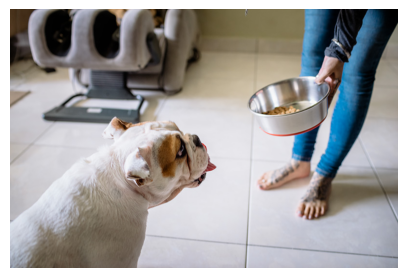

In [14]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

mask_generator = SamAutomaticMaskGenerator(sam)
!wget -P images https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/dog.jpg
image = cv2.imread('images/dog.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
masks = mask_generator.generate(image)
plt.figure(figsize=(5,5))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show()

In [16]:
masks

[]